In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
df=pd.read_csv("sna.csv")

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df.tail()

,User ID,Gender,Age,EstimatedSalary,Purchased
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [6]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [7]:
df.shape

(400, 5)

<Axes: xlabel='Gender', ylabel='Age'>

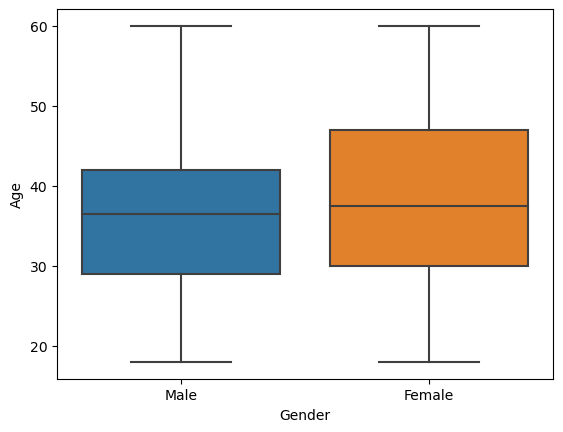

In [8]:
sns.boxplot(data=df,x='Gender',y='Age')

In [9]:
X= df[['Age','EstimatedSalary']]
Y=df['Purchased']
X

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [10]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [11]:
lr=LogisticRegression()

In [12]:
lr.fit(X_train,Y_train)

LogisticRegression()

In [13]:
lr

LogisticRegression()

In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [15]:
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [17]:
ypred=lr.predict(X_test)

C:\Users\Jyotiraditya Biswas\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [18]:
ypred

array([1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0], dtype=int64)

<Axes: xlabel='col_0', ylabel='Purchased'>

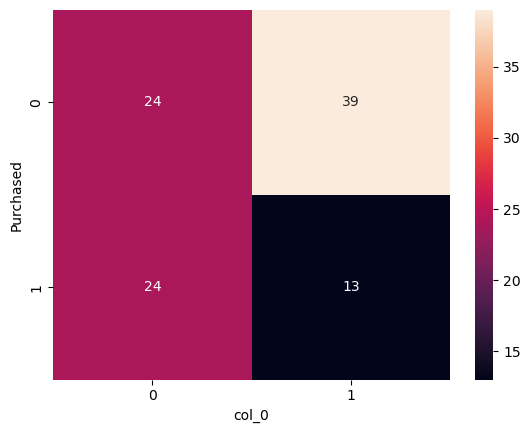

In [19]:
corr=pd.crosstab(Y_test,ypred)
sns.heatmap(corr,annot=True)

In [21]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
b=accuracy_score(Y_test, ypred)
a=mean_squared_error(Y_test,ypred)
print(a*100)
print(b*100)

63.0
37.0


In [22]:
tp=corr[0][0]
fp=corr[0][1]
fn=corr[1][0]
tn=corr[1][1]
print(tp)
print(fp)
print(fn)
print(tn)

24
24
39
13
